## In this assignment, students will be using the K-nearest neighbors  algorithm to predict how many points NBA players scored in the 2013-2014  season. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
nba = pd.read_csv('nba_2013.csv')

In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
nba[nba["x3p."].isnull()].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,...,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,...,23,38,2,3,12,3,17,28,2013-2014,2013


In [8]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

In [9]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

In [10]:
feat_list_obj = []
for i in nba.columns:
    if nba[i].dtype=="object":
        feat_list_obj.append(i)
        
feat_list_obj

['player', 'pos', 'bref_team_id', 'season']

In [11]:
feat_drop_list = feat_list_obj +["season_end","pts"]
feat_drop_list

['player', 'pos', 'bref_team_id', 'season', 'season_end', 'pts']

In [12]:
Features = nba.drop(feat_drop_list,axis=1)
Lables= nba["pts"]
print(Features.shape)
print(Lables.shape)

(481, 25)
(481,)


In [13]:
Features.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
dtype: int64

In [14]:
Features["fg."].fillna(Features["fg."].mean(),inplace=True)
Features["x2p."].fillna(Features["x2p."].mean(),inplace=True)
Features["efg."].fillna(Features["efg."].mean(),inplace=True)
Features["x3p."].fillna(Features["x3p."].mean(),inplace=True)
Features["ft."].fillna(Features["ft."].mean(),inplace=True)
Y = Lables.values ##--> Dependent Values

In [15]:
Features.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(Features,Y)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 25)
(121, 25)
(360,)
(121,)


In [18]:
sns.set_style("whitegrid")
for k in range(20):
    k_value=1+k
    neu=igh = KNeighborsRegressor(n_neighbors=k_value)
    neu.fit(x_train,y_train)
    y_pred = neu.predict(x_test)
    print("RMSE is :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For k value {}".format(k_value))

RMSE is :-  88.14361871775607 For k value 1
RMSE is :-  81.34522391969583 For k value 2
RMSE is :-  72.85064031500823 For k value 3
RMSE is :-  77.57868239929006 For k value 4
RMSE is :-  81.33551570932885 For k value 5
RMSE is :-  82.92611108082846 For k value 6
RMSE is :-  87.92879849240383 For k value 7
RMSE is :-  88.97359289383573 For k value 8
RMSE is :-  90.58101632414188 For k value 9
RMSE is :-  91.29329947441717 For k value 10
RMSE is :-  92.16674138023905 For k value 11
RMSE is :-  91.2252293510743 For k value 12
RMSE is :-  90.5259853963601 For k value 13
RMSE is :-  93.9551023981956 For k value 14
RMSE is :-  95.37743147758651 For k value 15
RMSE is :-  97.42398399542753 For k value 16
RMSE is :-  98.78410995872197 For k value 17
RMSE is :-  96.5671266687894 For k value 18
RMSE is :-  98.62167831755075 For k value 19
RMSE is :-  101.73117101962796 For k value 20


In [19]:
#note : It shows that we are get less error for values K =  5 , 6
k_value=5
neuigh=igh = KNeighborsRegressor(n_neighbors=k_value)
neuigh.fit(x_train,y_train)
y_pred = neuigh.predict(x_test)
print("RMSE for KNN Regressor is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For k value {}".format(k_value))
print("R Squared for KNN Regressor is  :- ",r2_score(y_test,y_pred))

RMSE for KNN Regressor is  :-  81.33551570932885 For k value 5
R Squared for KNN Regressor is  :-  0.9726611329606782


Text(0.5, 1.0, 'Actual vs Predicted Points')

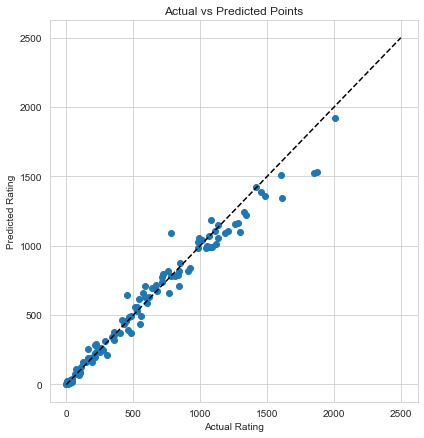

In [20]:
#R squared is a statistical measure of how close the data points are to thr fitted regression line


plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.plot([0,2500],[0,2500],'--k')
plt.axis("tight")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Points")

In [21]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(random_state = 1)
Rf.fit(x_train,y_train)
y_pred=Rf.predict(x_test)
print("RMSE for RandomForest Regressor is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R Squared for RandomForest Regressor is  :- ",r2_score(y_test,y_pred))

RMSE for RandomForest Regressor is  :-  52.744436367910836
R Squared for RandomForest Regressor is  :-  0.9885032953349514


Text(0.5, 1.0, 'Actual vs Predicted Points--RandomForestRegressor')

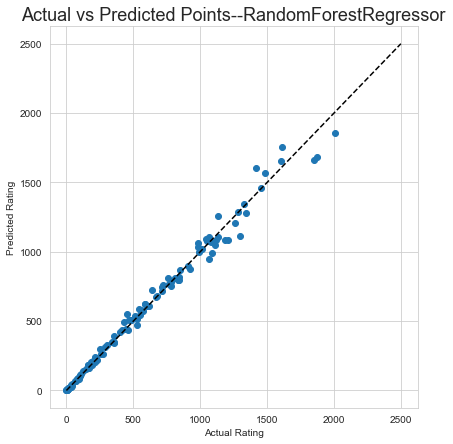

In [22]:
#R squared is a statistical measure of how close the data points are to thr fitted regression line


plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.plot([0,2500],[0,2500],'--k')
plt.axis("tight")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.tight_layout()
plt.title("Actual vs Predicted Points--RandomForestRegressor",fontsize=18)

In [23]:
for depth in range(30):
    depth+=1
    Rf = RandomForestRegressor(max_depth=depth,random_state =1)
    Rf.fit(x_train,y_train)
    y_pred=Rf.predict(x_test)
    print("RMSE is  :- ",np.sqrt(mean_squared_error(y_pred,y_test)),"For Depth value :-",depth)
    

RMSE is  :-  241.97474246484296 For Depth value :- 1
RMSE is  :-  120.12885179433188 For Depth value :- 2
RMSE is  :-  70.01110593091636 For Depth value :- 3
RMSE is  :-  59.50580786687762 For Depth value :- 4
RMSE is  :-  55.29846210031686 For Depth value :- 5
RMSE is  :-  53.81523169064212 For Depth value :- 6
RMSE is  :-  54.41103469474289 For Depth value :- 7
RMSE is  :-  53.138815243339586 For Depth value :- 8
RMSE is  :-  53.43299603950885 For Depth value :- 9
RMSE is  :-  50.93145610514773 For Depth value :- 10
RMSE is  :-  53.051465627387074 For Depth value :- 11
RMSE is  :-  52.26235308930614 For Depth value :- 12
RMSE is  :-  52.42349688322346 For Depth value :- 13
RMSE is  :-  52.06751951088634 For Depth value :- 14
RMSE is  :-  52.744436367910836 For Depth value :- 15
RMSE is  :-  52.744436367910836 For Depth value :- 16
RMSE is  :-  52.744436367910836 For Depth value :- 17
RMSE is  :-  52.744436367910836 For Depth value :- 18
RMSE is  :-  52.744436367910836 For Depth value

##### NOTE :-the random forest regressor gives a low RMSE value for maxdepth =13 and The RMSE remains constant aftermath.

#####  CONCLUSION

##### The R Squared for KNN Regressor is  0.9703610383923194

##### The R Squared for RandomForest Regressor is  0.9898425129090567
